# Read and Parse Chainer logs

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [3]:
!ls cifar*.log

cifar-series-4.log         cifar_errors.log
cifar-series.log           cifar_series_run_25fix.log


## CIFAR100 runs with various batch sizes and learning rates

In [8]:
run_pattern = re.compile(r"^run\s+(\d+)/(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [14]:
with open("cifar_series_run_25fix.log","r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    ind = 0
    loss = 0
    acc = 0
    learn = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
    for line in lines:
        s = line.strip()
        m = run_pattern.match(s)        
        if m:
            run = int(m.group(1))
#            learn = float(m.group(2))            
#            run += 1
            #print batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1

In [16]:
df.iloc[:12]

,run,epoch,loss,acc,time
0,1.0,1.0,4.60981,0.013322,47.9632
1,1.0,2.0,4.59485,0.017814,95.9869
2,1.0,3.0,4.38625,0.020502,143.8600
3,1.0,4.0,4.24186,0.033967,192.3160
4,1.0,5.0,4.22163,0.031882,240.8920
5,1.0,6.0,4.21688,0.040901,289.0820
6,1.0,7.0,4.03680,0.056445,337.7720
7,1.0,8.0,3.91561,0.071168,386.4640
8,1.0,9.0,3.71934,0.093382,434.7290
9,1.0,10.0,3.83088,0.093026,483.4250


In [39]:
df_loss = df.pivot(index="run",columns="epoch",values="loss")
df_loss.index = df_loss.index.map(lambda s: "loss"+str(int(s)))
df_loss

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
loss1,4.60981,4.59485,4.38625,4.24186,4.22163,4.21688,4.03680,3.91561,3.71934,3.83088
loss2,4.59654,4.59331,5.04625,4.68450,4.73021,4.58848,4.29282,4.04620,4.03471,3.80092
loss3,4.61861,4.50514,4.46059,4.37893,4.38491,4.29948,4.09060,3.74038,3.64952,3.31474
loss4,4.60456,4.55737,4.82596,4.42597,4.60964,4.27295,4.08861,4.30088,3.80549,3.68991
loss5,4.61065,4.66241,4.77081,4.26691,4.34764,4.32339,4.31502,4.05575,4.00069,3.82226
loss6,4.61919,4.56249,4.70781,4.36773,4.16609,4.28457,4.54323,4.00575,3.82327,3.57484
loss7,4.59228,4.56781,4.30434,4.31635,4.21853,4.28034,3.88522,3.83984,3.90817,3.63937
loss8,4.61500,4.58406,4.90725,4.98925,4.52259,5.07192,4.42909,4.05241,3.98224,3.72004
loss9,4.63272,4.50110,4.42545,4.29863,4.36416,4.07296,4.14307,4.01732,3.75308,3.51399


In [134]:
df_acc = df.pivot(index="run",columns="epoch",values="acc")
df_acc.index = df_acc.index.map(lambda s: "acc"+str(int(s)))
df_acc

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
acc1,0.013322,0.017814,0.020502,0.033967,0.031882,0.040901,0.056445,0.071168,0.093382,0.093026
acc2,0.012477,0.013724,0.010587,0.014200,0.016498,0.022576,0.043991,0.068503,0.065418,0.102574
acc3,0.012293,0.019939,0.019106,0.024604,0.029412,0.038155,0.059559,0.096576,0.109766,0.151494
acc4,0.011707,0.018985,0.016205,0.020330,0.017521,0.035771,0.051120,0.054636,0.089126,0.115682
acc5,0.010599,0.010880,0.013798,0.029791,0.026407,0.029802,0.045393,0.059800,0.071415,0.093032
acc6,0.014700,0.018020,0.014798,0.023466,0.039401,0.034835,0.042475,0.072719,0.086477,0.118853
acc7,0.012127,0.017434,0.029682,0.026752,0.038959,0.035788,0.076005,0.077459,0.081359,0.111167
acc8,0.010208,0.015125,0.013103,0.016923,0.018486,0.016165,0.038994,0.056135,0.069692,0.101689
acc9,0.010989,0.017279,0.021306,0.031612,0.027901,0.049535,0.050936,0.072007,0.100925,0.136001


In [112]:
df_time = df.pivot(index="run",columns="epoch",values="time")
df_time.index = df_time.index.map(lambda s: "time"+str(int(s)))
df_time.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
time1,47.9632,95.9869,143.860,192.316,240.892,289.082,337.772,386.464,434.729,483.425
time2,49.1663,97.6234,145.808,194.525,243.255,291.529,340.258,388.988,437.283,485.998
time3,49.2656,97.9634,146.231,195.023,243.798,292.103,340.845,389.616,437.930,486.704
time4,49.1829,97.8357,146.066,194.784,243.512,291.791,340.558,389.335,437.605,486.360
time5,49.2710,97.9798,146.237,194.994,243.731,292.044,340.823,389.620,437.945,486.728


In [116]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [206]:
df_time["perc"] = df_time[10]
df_time["perc"] = RelativePercentDifference(df_time["perc"])
df_time.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
time1,47.9632,95.9869,143.860,192.316,240.892,289.082,337.772,386.464,434.729,483.425,99.399023
time2,49.1663,97.6234,145.808,194.525,243.255,291.529,340.258,388.988,437.283,485.998,99.928068
time3,49.2656,97.9634,146.231,195.023,243.798,292.103,340.845,389.616,437.930,486.704,100.073232
time4,49.1829,97.8357,146.066,194.784,243.512,291.791,340.558,389.335,437.605,486.360,100.002500
time5,49.2710,97.9798,146.237,194.994,243.731,292.044,340.823,389.620,437.945,486.728,100.078166


In [208]:
df_acc["perc"] = df_acc[10]
df_acc["perc"] = RelativePercentDifference(df_acc["perc"])
df_loss["perc"] = df_loss[10]
df_loss["perc"] = RelativePercentDifference(df_loss["perc"])
df_loss.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
loss1,4.60981,4.59485,4.38625,4.24186,4.22163,4.21688,4.03680,3.91561,3.71934,3.83088,104.133175
loss2,4.59654,4.59331,5.04625,4.68450,4.73021,4.58848,4.29282,4.04620,4.03471,3.80092,103.318786
loss3,4.61861,4.50514,4.46059,4.37893,4.38491,4.29948,4.09060,3.74038,3.64952,3.31474,90.103162
loss4,4.60456,4.55737,4.82596,4.42597,4.60964,4.27295,4.08861,4.30088,3.80549,3.68991,100.301248
loss5,4.61065,4.66241,4.77081,4.26691,4.34764,4.32339,4.31502,4.05575,4.00069,3.82226,103.898862


In [209]:
df_acc.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
acc1,0.013322,0.017814,0.020502,0.033967,0.031882,0.040901,0.056445,0.071168,0.093382,0.093026,79.688740
acc2,0.012477,0.013724,0.010587,0.014200,0.016498,0.022576,0.043991,0.068503,0.065418,0.102574,87.867642
acc3,0.012293,0.019939,0.019106,0.024604,0.029412,0.038155,0.059559,0.096576,0.109766,0.151494,129.773827
acc4,0.011707,0.018985,0.016205,0.020330,0.017521,0.035771,0.051120,0.054636,0.089126,0.115682,99.096307
acc5,0.010599,0.010880,0.013798,0.029791,0.026407,0.029802,0.045393,0.059800,0.071415,0.093032,79.693623


In [276]:
def plotBox(df):
    meanlineprops = dict(linewidth=1, color=(0.2,.5,.8),linestyle="--")
    color = dict(medians=(1,.7,.3))
    df.plot.box(showmeans=True, meanline=True, 
                            color=color,meanprops=meanlineprops)
    ax = plt.gca()
    return ax

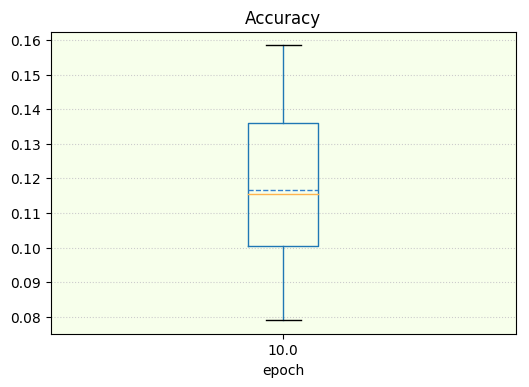

In [277]:
ax = plotBox(df_acc[10])
ax.set_title("Accuracy")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")

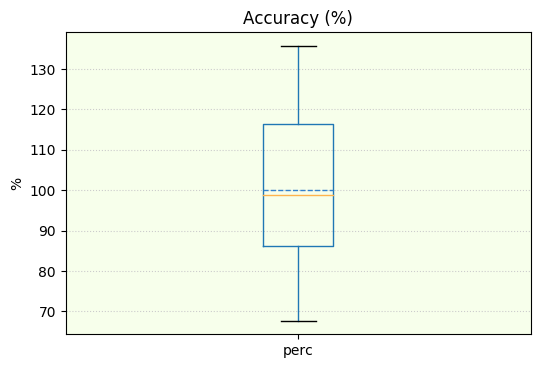

In [288]:
ax = plotBox(df_acc["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Accuracy (%)")
ax.set_ylabel("%")
ax.set_facecolor("#CBFF7725")

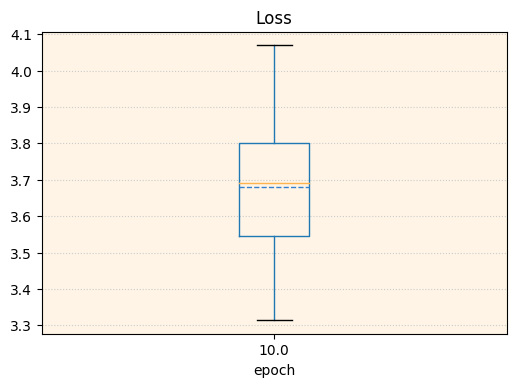

In [282]:
ax = plotBox(df_loss[10])
ax.set_title("Loss")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
ax.set_facecolor("#FFAC3620")

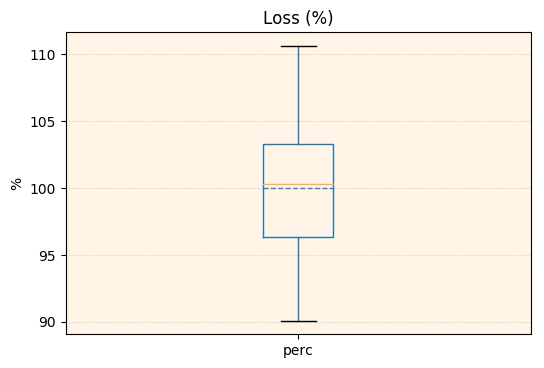

In [287]:
ax = plotBox(df_loss["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Loss (%)")
ax.set_ylabel("%")
ax.set_facecolor("#FFAC3620")

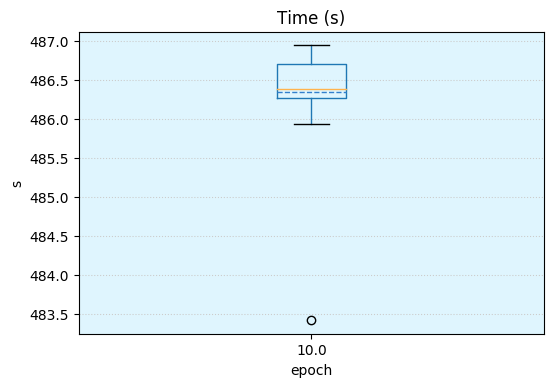

In [284]:
#df_time[10].plot.box(title="Time (s)")
ax = plotBox(df_time[10])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("s")
ax.set_title("Time (s)")
ax.set_xlabel("epoch")
ax.set_facecolor("#00B7FA20")

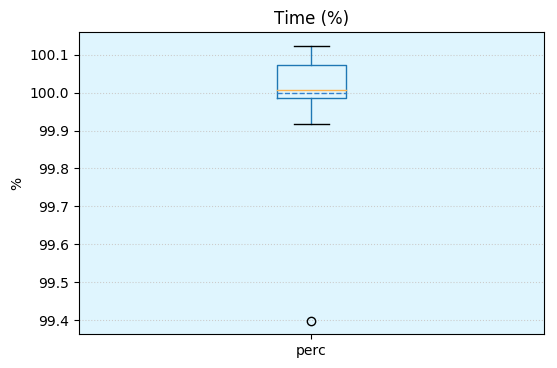

In [286]:
ax = plotBox(df_time["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("%")
ax.set_title("Time (%)")
ax.set_facecolor("#00B7FA20")

In [127]:
df_loss.to_csv("cifar_series_run_25fix-loss.csv")
df_acc.to_csv("cifar_series_run_25fix-acc.csv")
df_time.to_csv("cifar_series_run_25fix-time.csv")